# Задание 1

In [79]:
import numpy as np
from sklearn import mixture
from sklearn import datasets
from copy import deepcopy
import matplotlib.pyplot as plt
from itertools import cycle, islice,count
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score

In [37]:
def make_ds():
    global ds,X,y,color,dt
    ds = datasets.make_blobs(n_samples = 1500, centers = 2 , center_box = (-7.5,7.0),cluster_std = [1.4,1.7],random_state=42)
    X_2,_= datasets.make_blobs(n_samples = 1500, random_state=170 , centers=[[-4,-3]],cluster_std = [1.4])
    transformation=[[1.2,-0.8], [-0.4,1.7]]
    X_2 = np.dot(X_2, transformation)
    X = np.concatenate((ds[0][:,0], X_2[:,0]))
    y = np.concatenate((ds[0][:,1], X_2[:,1]))
    color = np.concatenate((ds[1], np.array([2]*len(X_2))))
    plt.rcParams['figure.figsize']= 10,10
    dt = np.concatenate([np.reshape(X,(X.shape[0],1)),np.reshape(y,(y.shape[0],1))],axis = 1)
    
    plt.scatter(X,y,c=color,alpha = 0.4)

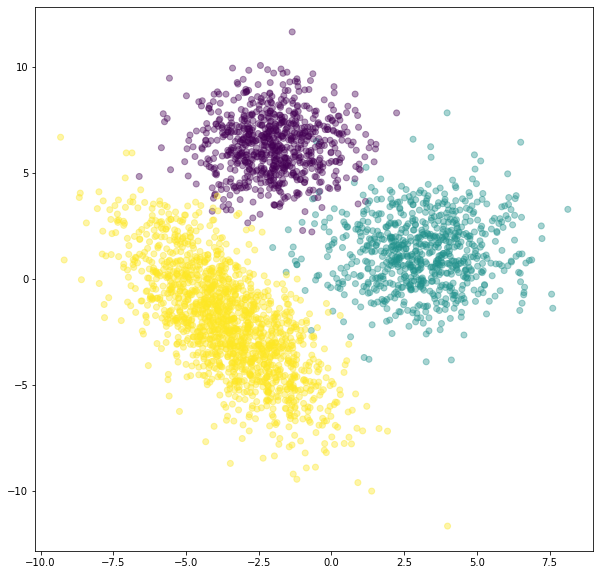

In [39]:
make_ds()

In [40]:
unique, counts=np.unique(color, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

(3000,) (3000,)
Центроиды:
[3.20844212 1.25447168]
[-3.38460635 -2.34689763]
[-2.375875    5.98916061]


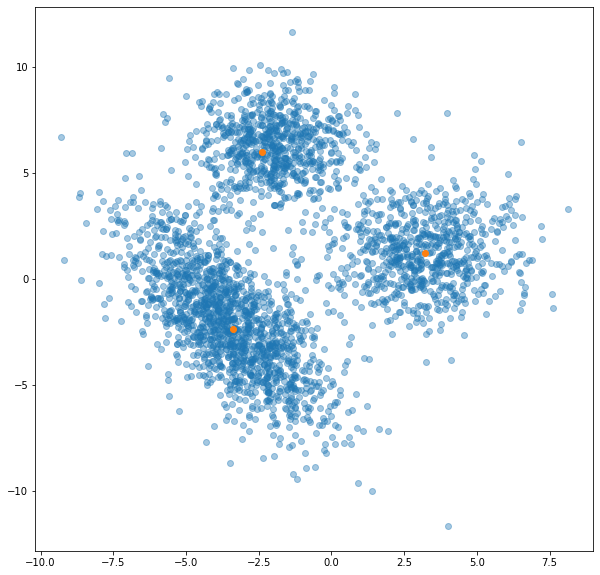

In [41]:
print(X.shape,y.shape)
k_means = KMeans(n_clusters=3,init='k-means++',random_state = 42)

k_means.fit(dt)
y_kmeans = k_means.predict(dt)
clusters = k_means.cluster_centers_
print('Центроиды:',*clusters,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(clusters[:,0],clusters[:,1])

Коэффициент силуэта = 0.5565607593618408
Однородность = 0.8524070299632741
Полнота = 0.8410620974077413
V-мера = 0.8466965625514424


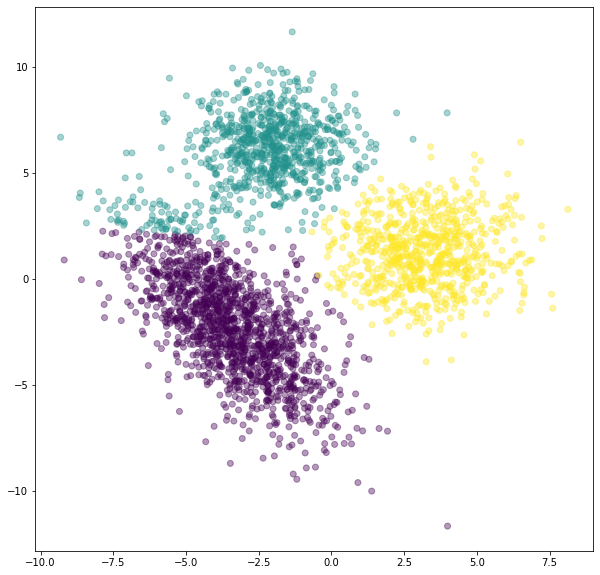

In [43]:
y_km = k_means.fit_predict(dt)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.scatter(X,y,c=y_km,alpha = 0.4)

k_means_silh_score = silhouette_score(X=dt, labels=y_km, metric='euclidean')
print('Коэффициент силуэта =', k_means_silh_score)

k_means_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_km)
print('Однородность =', k_means_homogeneity_score)

#полнота
k_means_completeness_score = completeness_score(labels_true=color, labels_pred=y_km)

#V-мера
k_means_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_km)

print(f'Полнота = {k_means_completeness_score}\nV-мера = {k_means_v_measure_score}')

# Задание 2

In [243]:
unique, counts = np.unique(y_km, return_counts=True)
dict(zip(unique, counts))

{0: 1427, 1: 849, 2: 724}

# Задание 3 GaussianMixture

Коэффициент силуэта = 0.5510454622044053
Однородность = 0.9413908238316211
Полнота = 0.9409991163380917
V-мера = 0.9411949293295492


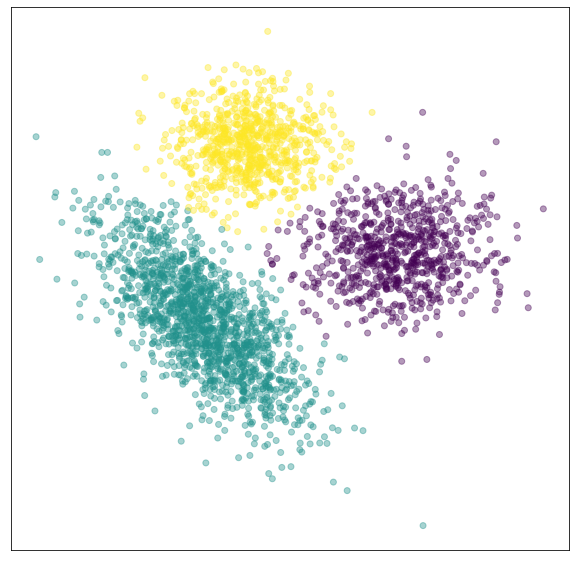

In [45]:
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

plt.xticks([]); plt.yticks([])
plt.scatter(X,y,c=y_pred,alpha = 0.4)

GM_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', GM_silh_score)

gm_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_pred)
print('Однородность =', gm_homogeneity_score)

#полнота
gm_completeness_score = completeness_score(labels_true=color, labels_pred=y_pred)
#V-мера
gm_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'Полнота = {gm_completeness_score}\nV-мера = {gm_v_measure_score}')

Центроиды:
[3.1131007  1.24211411]
[-3.55837274 -2.05615535]
[-1.99676245  6.30344946]


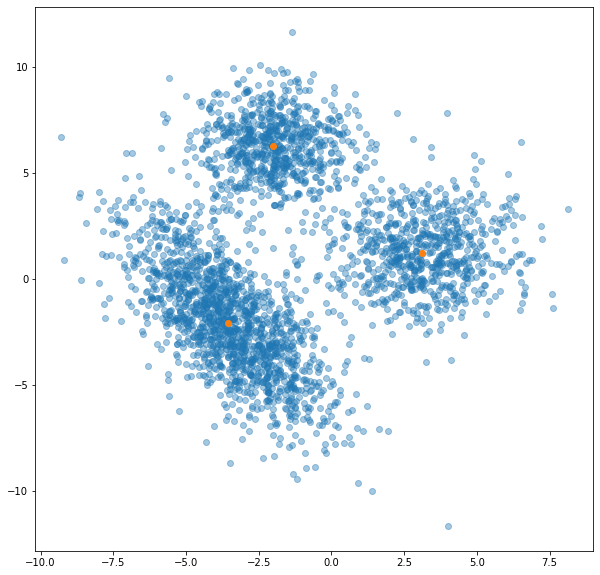

In [245]:
print('Центроиды:',*GM.means_,sep='\n')
plt.scatter(X,y,alpha = 0.4)
plt.scatter(GM.means_[:,0],GM.means_[:,1])

# Задание 4

In [246]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 743, 1: 1498, 2: 759}

# Задание 5 AgglomerativeClustering

Коэффициент силуэта = 0.5446212848972123
Однородность = 0.9214246956215068
Полнота = 0.9184099255081112
V-мера = 0.9199148405496422


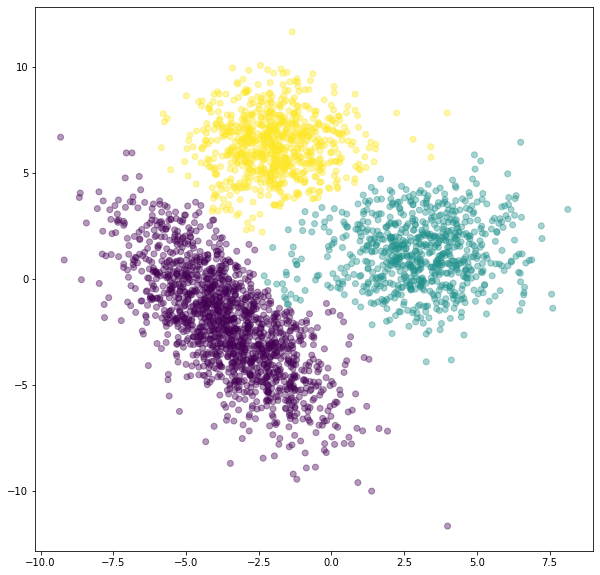

In [49]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dt)
y_pred = ac.labels_.astype(int)

plt.scatter(X,y,c=y_pred,alpha = 0.4)

ac_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', ac_silh_score)

ac_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_pred)
print('Однородность =', ac_homogeneity_score)

#полнота
ac_completeness_score = completeness_score(labels_true=color, labels_pred=y_pred)

#V-мера
ac_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'Полнота = {ac_completeness_score}\nV-мера = {ac_v_measure_score}')

# Задание 6

In [249]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1485, 1: 755, 2: 760}

# Задание 7

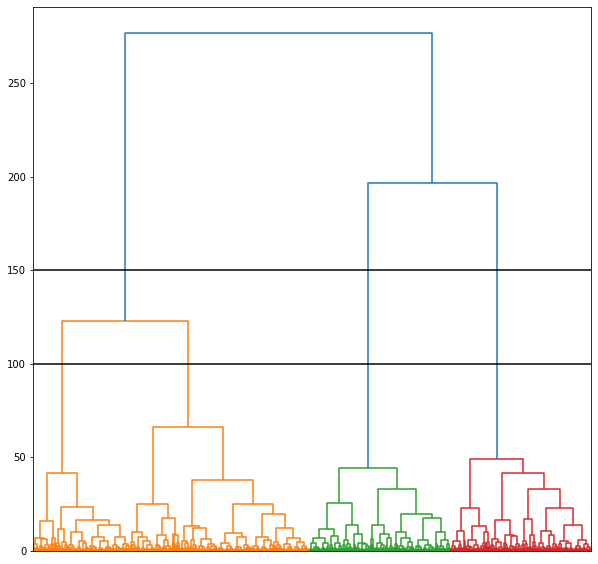

In [250]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
Z = hierarchy.linkage(dt, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, no_labels = True)
plt.axhline(150, c='black')
plt.axhline(100, c='black')
plt.show()

# Задание 8

In [251]:
def task8(m):
    l = [max(i) for i in dn['dcoord'] if max(i) > m]    
    return len(l)

In [252]:
print('Кластеров при граничном расстоянии для разделения кластеров 150:', task8(150))
print('Кластеров при граничном расстоянии для разделения кластеров 150:', task8(100))

Кластеров при граничном расстоянии для разделения кластеров 150: 2
Кластеров при граничном расстоянии для разделения кластеров 150: 3


# Задание 9


Коэффициент силуэта = 0.5091093090116814
Однородность = 0.9013179956761241
Полнота = 0.7643993263896584
V-мера = 0.8272314391294991


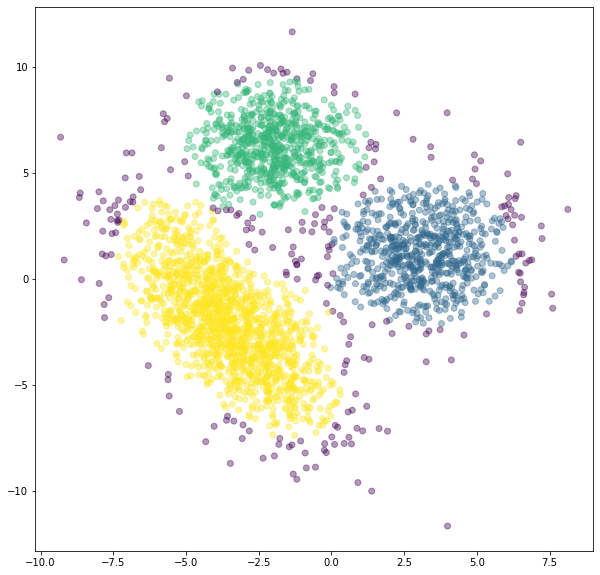

In [300]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9,min_samples=35)

dbscan.fit(dt)
y_pred = dbscan.labels_.astype(int)
plt.scatter(X, y, c=y_pred, alpha = 0.4)
dbscan_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')
print('Коэффициент силуэта =', dbscan_silh_score)

dbscan_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_pred)
print('Однородность =', dbscan_homogeneity_score)

#полнота
dbscan_completeness_score = completeness_score(labels_true=color, labels_pred=y_pred)
#V-мера
dbscan_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'Полнота = {dbscan_completeness_score}\nV-мера = {dbscan_v_measure_score}')

In [255]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 230, 0: 656, 1: 711, 2: 1403}

# Задание 10

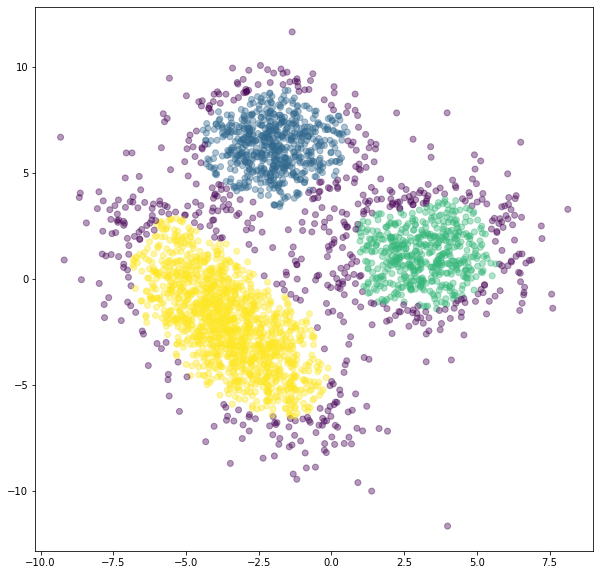

In [256]:
dbscan = DBSCAN(eps=0.7,min_samples=35)

dbscan.fit(dt)
y_pred = dbscan.labels_.astype(int)
plt.scatter(X, y, c=y_pred, alpha = 0.4)

In [257]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{-1: 586, 0: 616, 1: 507, 2: 1291}

# Задание 11 

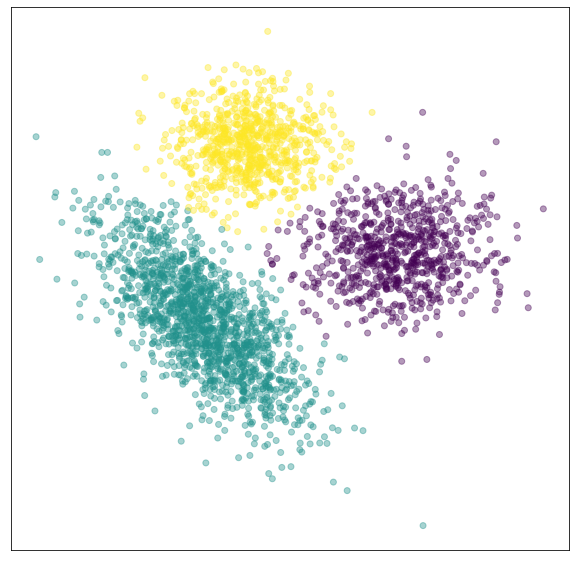

In [258]:
from sklearn import mixture
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

plt.xticks([]); plt.yticks([])
plt.scatter(X,y,c=y_pred,alpha = 0.4)

In [259]:
gm_silh_score = silhouette_score(X=dt, labels=y_pred, metric='euclidean')

print('Коэффициент силуэта =', gm_silh_score)


Коэффициент силуэта = 0.5510454622044053


# Задание 12

In [260]:
res = {'K-means': k_means_silh_score,'EM-алгоритма': gm_silh_score,'Агломеративная кластеризация': ac_silh_score,'DBSCAN': dbscan_silh_score}
print(*[ k +' : '+ str(v) for k,v in res.items()],sep='\n')
print()
print(f'Максимальное значение коэффициента силуэта у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

K-means : 0.5565607593618408
EM-алгоритма : 0.5510454622044053
Агломеративная кластеризация : 0.5446212848972123
DBSCAN : 0.5091093090116814

Максимальное значение коэффициента силуэта у K-means со значением 0.5565607593618408


# Задание 13

In [262]:
res = {'K-means' : {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0},
       'EM-алгоритм': {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0},
       'Агломеративная кластеризация': {'Значение коэффициента силуэта' : 0, 'Число кластеров': 0}
       }

for i in range(2, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    gm = mixture.GaussianMixture(n_components=i,random_state=42)
    ac = AgglomerativeClustering(n_clusters=i)
    
    k_means.fit(dt)
    gm.fit(dt)
    ac.fit(dt)
    
    ypred_k_means = k_means.labels_.astype(int)
    ypred_gm = gm.predict(dt)
    ypred_ac = ac.labels_.astype(int)
    
    k_means_silh_score = silhouette_score(X=dt, labels=ypred_k_means)
    gm_silh_score = silhouette_score(X=dt, labels=ypred_gm)
    ac_silh_score = silhouette_score(X=dt, labels=ypred_ac)
    
    if res['K-means']['Значение коэффициента силуэта'] < k_means_silh_score:
        res['K-means']['Значение коэффициента силуэта'] = k_means_silh_score
        res['K-means']['Число кластеров'] = i

    if res['EM-алгоритм']['Значение коэффициента силуэта'] <  gm_silh_score:
        res['EM-алгоритм']['Значение коэффициента силуэта'] = gm_silh_score
        res['EM-алгоритм']['Число кластеров'] = i
        
    if res['Агломеративная кластеризация']['Значение коэффициента силуэта'] < ac_silh_score:
        res['Агломеративная кластеризация']['Значение коэффициента силуэта'] = ac_silh_score
        res['Агломеративная кластеризация']['Число кластеров'] = i

In [263]:
for i in res.items():
    print(f'Алгоритм : {i[0]}')
    print('Значение коэффициента силуэта:', i[1]['Значение коэффициента силуэта'])
    print('Число кластеров', i[1]['Число кластеров'])
    print()


Алгоритм : K-means
Значение коэффициента силуэта: 0.5565607593618408
Число кластеров 3

Алгоритм : EM-алгоритм
Значение коэффициента силуэта: 0.5510454622044053
Число кластеров 3

Алгоритм : Агломеративная кластеризация
Значение коэффициента силуэта: 0.5446212848972123
Число кластеров 3



# Задание 14

In [290]:
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

gm_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_pred)
print('Однородность =', gm_homogeneity_score)

Однородность = 0.9413908238316211


# Задание 15

In [280]:
res = {'K-means': k_means_homogeneity_score,'EM-алгоритм': gm_homogeneity_score,'Агломеративная кластеризация': ac_homogeneity_score,'DBSCAN': dbscan_homogeneity_score}
print(*[ k +' : '+ str(v) for k,v in res.items()],sep='\n')
print()
print(f'Максимальное значение коэффициента однородности у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

K-means : 0.9013179956761241
EM-алгоритм : 0.9413908238316211
Агломеративная кластеризация : 0.9327486953631801
DBSCAN : 0.9013179956761241

Максимальное значение коэффициента однородности у EM-алгоритм со значением 0.9413908238316211


# Задание 16

In [291]:
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(dt)
y_pred = GM.predict(dt)

#полнота
gm_completeness_score = completeness_score(labels_true=color, labels_pred=y_pred)
#V-мера
gm_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'Полнота = {gm_completeness_score}\nV-мера = {gm_v_measure_score}')

Полнота = 0.9409991163380917
V-мера = 0.9411949293295492


# Задание 17

In [301]:
res = {'K-means': k_means_completeness_score,'gm-алгоритм': gm_completeness_score,'Агломеративная кластеризация': ac_completeness_score,'DBSCAN': dbscan_completeness_score}
print(*[ k +' : '+ str(v) for k,v in res.items()],sep='\n')
print()
print(f'Максимальное значение коэффициента однородности у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

K-means : 0.8410620974077413
gm-алгоритм : 0.9409991163380917
Агломеративная кластеризация : 0.9184099255081112
DBSCAN : 0.7643993263896584

Максимальное значение коэффициента однородности у gm-алгоритм со значением 0.9409991163380917


In [303]:
res = {'K-means': k_means_v_measure_score,'gm-алгоритм': gm_v_measure_score,'Агломеративная кластеризация': ac_v_measure_score,'DBSCAN': dbscan_v_measure_score}
print(*[ k +' : '+ str(v) for k,v in res.items()], sep='\n')
print()
print(f'Максимальное значение коэффициента V-мерЫ у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

K-means : 0.8466965625514424
gm-алгоритм : 0.9411949293295492
Агломеративная кластеризация : 0.9199148405496422
DBSCAN : 0.8272314391294991

Максимальное значение коэффициента V-мерЫ у gm-алгоритм со значением 0.9411949293295492


# Задание 18

Центроиды:
[3.20844212 1.25447168]
[-3.38460635 -2.34689763]
[-2.375875    5.98916061]
Коэффициент силуэта = 0.5565607593618408
Однородность = 0.852407029963274
Полнота = 0.8410620974077412
V-мера = 0.8466965625514422


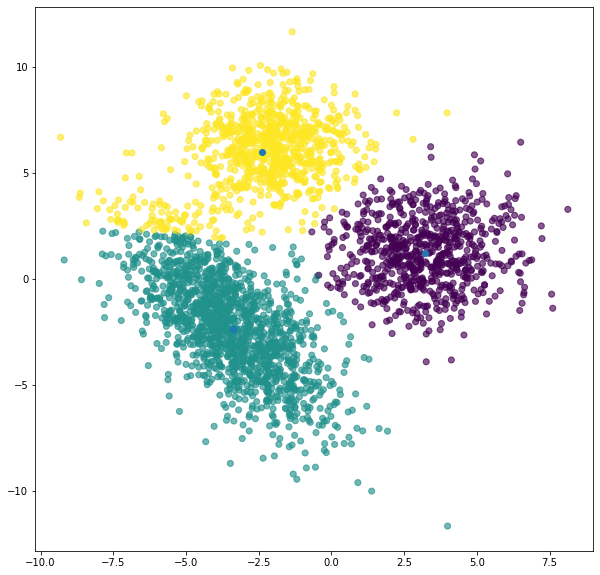

In [312]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,
                 n_init=1, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state = 42
                )

k_means.fit(dt)

clusters = k_means.cluster_centers_
print('Центроиды:',*clusters,sep='\n')

y_km = k_means.fit_predict(dt)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.scatter(X,y,c=y_km,alpha = 0.4)
k_means_silh_score = silhouette_score(X=dt, labels=y_km, metric='euclidean')
print('Коэффициент силуэта =', k_means_silh_score)

k_means_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_km)
print('Однородность =', k_means_homogeneity_score)

#полнота
k_means_completeness_score = completeness_score(labels_true=color, labels_pred=y_km)
#V-мера
k_means_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_km)
print(f'Полнота = {k_means_completeness_score}\nV-мера = {k_means_v_measure_score}')

plt.scatter(X,y,c=y_km,alpha = 0.4)
plt.scatter(clusters[:,0],clusters[:,1])

Центроиды:
[-4.73323283  0.01040903]
[0.53189978 4.06790844]
[-1.97825884 -3.80430993]
Коэффициент силуэта = 0.3726347252075777
Однородность = 0.5754854765676627
Полнота = 0.5652165403775116
V-мера = 0.5703047864755577


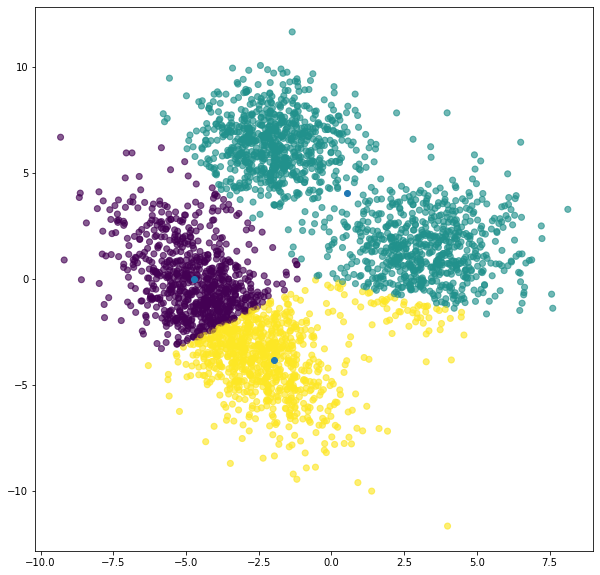

In [313]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3,
                 n_init=1, 
                 init='random', # 'k-means++', 'random', numpy.array
                 random_state = 42
                )

k_means.fit(dt)

clusters = k_means.cluster_centers_
print('Центроиды:',*clusters,sep='\n')

y_km = k_means.fit_predict(dt)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.scatter(X,y,c=y_km,alpha = 0.4)
k_means_silh_score = silhouette_score(X=dt, labels=y_km, metric='euclidean')
print('Коэффициент силуэта =', k_means_silh_score)

k_means_homogeneity_score = homogeneity_score(labels_true=color, labels_pred=y_km)
print('Однородность =', k_means_homogeneity_score)

#полнота
k_means_completeness_score = completeness_score(labels_true=color, labels_pred=y_km)
#V-мера
k_means_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_km)
print(f'Полнота = {k_means_completeness_score}\nV-мера = {k_means_v_measure_score}')

plt.scatter(X,y,c=y_km,alpha = 0.4)
plt.scatter(clusters[:,0],clusters[:,1])

# Задание 19 

V-мера = 0.8466965625514422


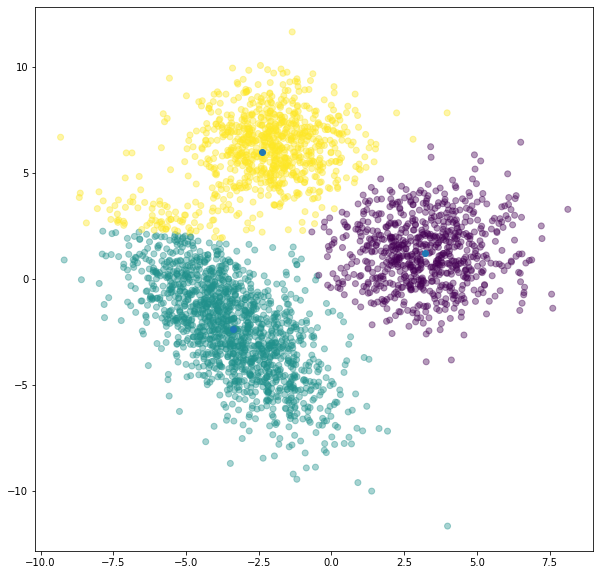

In [317]:
k_means = KMeans(n_clusters=3, n_init=1, random_state=42)

k_means.fit(dt)
y_pred = k_means.labels_.astype(int)

k_means_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print('V-мера =', k_means_v_measure_score)

plt.scatter(X,y,c=y_pred,alpha = 0.4)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])

V-мера = 0.534876610638371


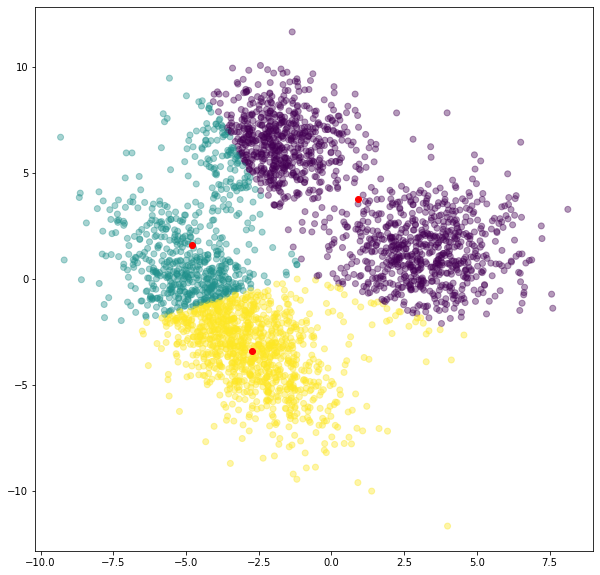

In [319]:
from sklearn.cluster import MiniBatchKMeans
mini_k_means = MiniBatchKMeans(n_clusters=3, init='random', n_init=1, random_state=4)
mini_k_means.fit(dt)
y_pred_mini = mini_k_means.labels_.astype(int)

k_means_mini_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred_mini)
print('V-мера =', k_means_mini_v_measure_score)

plt.scatter(X,y,c=y_pred_mini,alpha = 0.4)
plt.scatter(mini_k_means.cluster_centers_[:,0],mini_k_means.cluster_centers_[:,1],color='red')

In [325]:
res={'k_means':k_means_v_measure_score,'mini_k_means':k_means_mini_v_measure_score}
print(f'Максимальное значение коэфициента V-меры = {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

Максимальное значение коэфициента V-меры = k_means со значением 0.8466965625514422


# Задание 20

In [337]:
from sklearn.cluster import AgglomerativeClustering

V-мера = 0.9199148405496422


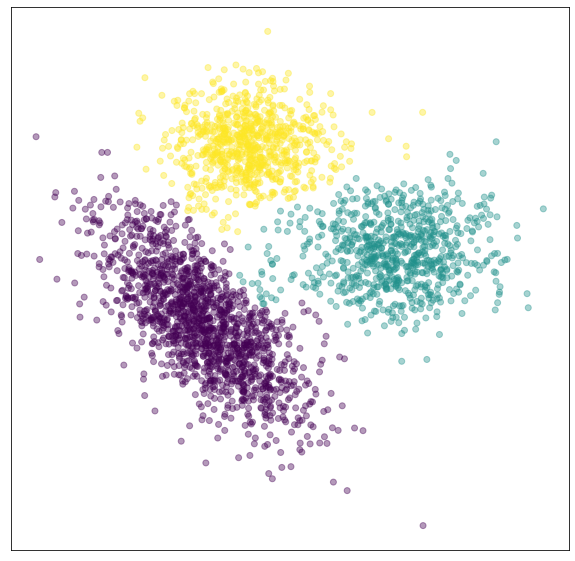

In [338]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(dt)
y_pred = ac.labels_.astype(int)
plt.xticks([])
plt.yticks([])
plt.scatter(X,y,c=y_pred,alpha = 0.4)

ac_ward_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {ac_ward_v_measure_score}')

V-мера = 0.6123780961842332


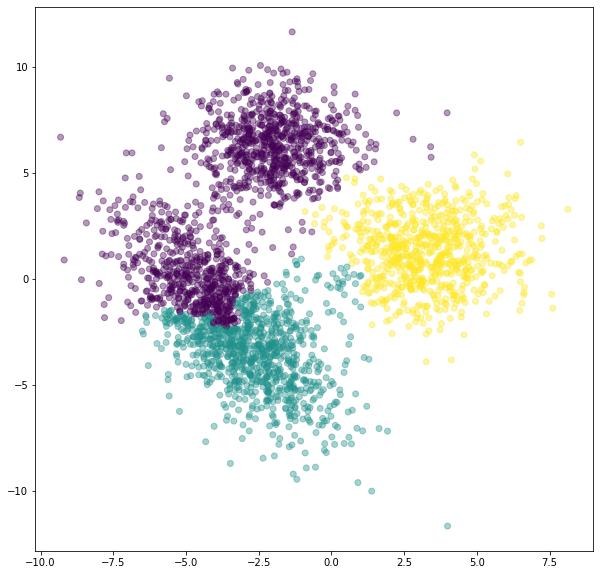

In [52]:
ac = AgglomerativeClustering(n_clusters=3, linkage='complete')
ac.fit(dt)
y_pred = ac.labels_.astype(int)

plt.scatter(X,y,c=y_pred,alpha = 0.4)

ac_complete_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {ac_complete_v_measure_score}')

V-мера = 0.6578811536085676


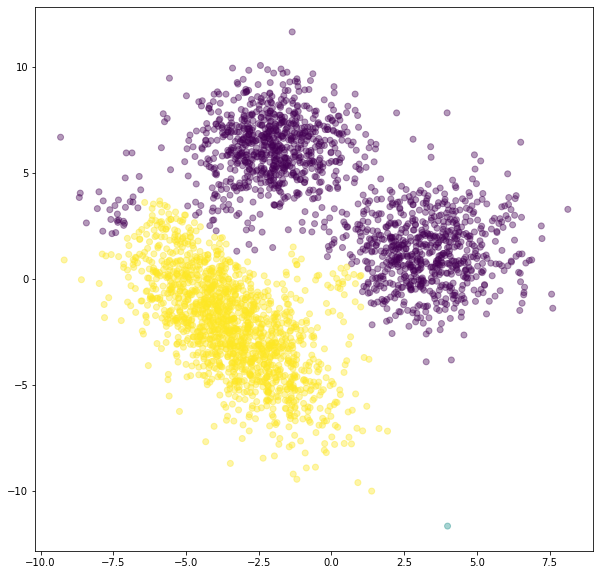

In [53]:
ac = AgglomerativeClustering(n_clusters=3, linkage='average')
ac.fit(dt)
y_pred = ac.labels_.astype(int)

plt.scatter(X,y,c=y_pred,alpha = 0.4)

#V-мера
ac_average_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {ac_average_v_measure_score}')

V-мера = 0.0008842106330108959


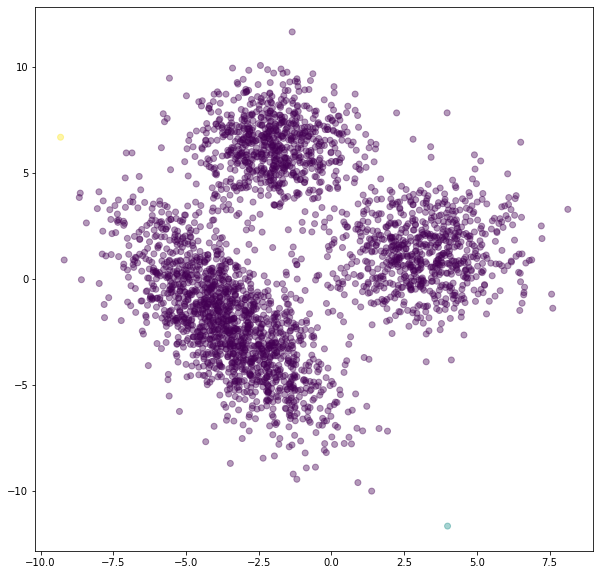

In [54]:
ac = AgglomerativeClustering(n_clusters=3, linkage='single')
ac.fit(dt)
y_pred = ac.labels_.astype(int)

plt.scatter(X,y,c=y_pred,alpha = 0.4)

ac_single_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {ac_single_v_measure_score}')

# Задание 21

In [342]:
res = {'ward':ac_ward_v_measure_score,
       'complete':ac_complete_v_measure_score,
       'average':ac_average_v_measure_score,
       'single':ac_single_v_measure_score}

print(*[ k +' : '+ str(v) for k,v in res.items()], sep='\n')
print()
print(f'Максимальное значение коэффициента V-мерЫ у {max(res, key=res.get)} со значением {res[max(res, key=res.get)]}')

ward : 0.9199148405496422
complete : 0.6123780961842332
average : 0.6578811536085676
single : 0.0008842106330108959

Максимальное значение коэффициента V-мерЫ у ward со значением 0.9199148405496422


# Задание 22

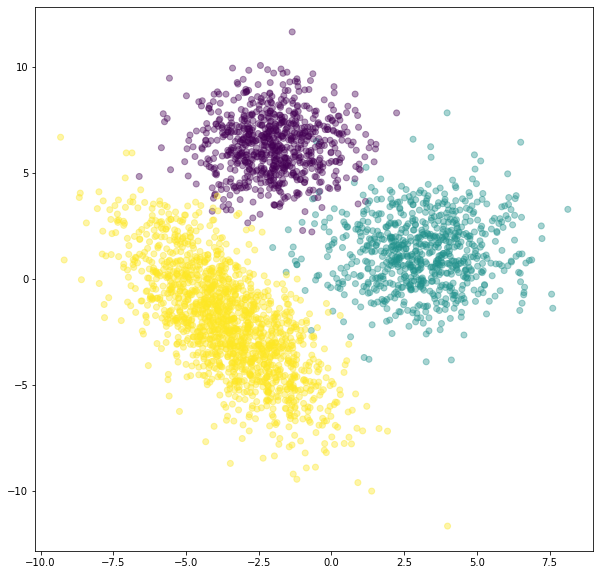

In [425]:
make_ds()

V-мера = 0.8272314391294991


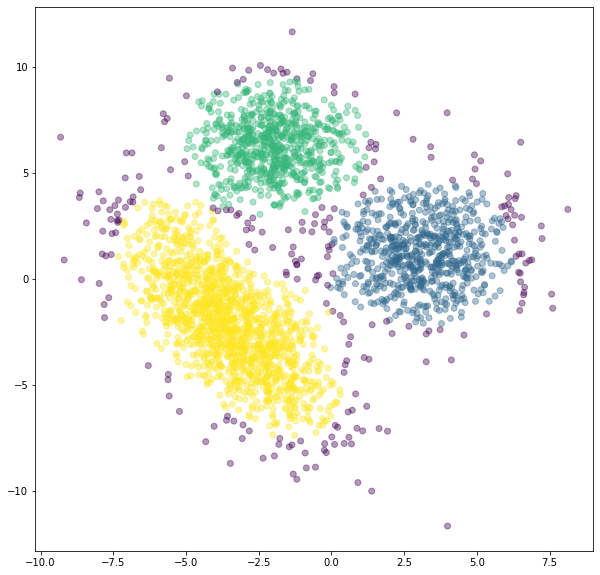

In [426]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.9,min_samples=35)

dbscan.fit(dt)
y_pred = dbscan.labels_.astype(int)

plt.scatter(X, y, c=y_pred, alpha = 0.4)

#V-мера
dbscan_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {dbscan_v_measure_score}')

In [414]:
class fullprint:
    'Для теста'

    def __init__(self, **kwargs):
        kwargs.setdefault('threshold', np.inf)
        self.opt = kwargs

    def __enter__(self):
        self._opt = np.get_printoptions()
        np.set_printoptions(**self.opt)

    def __exit__(self, type, value, traceback):
        np.set_printoptions(**self._opt)

In [427]:
y = np.delete(color, np.where(y_pred == [-1]), axis=0)
y_pred = np.delete(y_pred, np.where(y_pred == [-1]), axis=0)

dbscan_v_measure_score = v_measure_score(labels_true=y, labels_pred=y_pred)
print(f'V-мера = {dbscan_v_measure_score}')

V-мера = 0.9761529019109058


# Задание 23

In [91]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dt)
y_pred = ac.labels_.astype(int)

dt_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {dt_v_measure_score}')

V-мера = 0.9199148405496422


In [92]:
scaler = StandardScaler()
scaler.fit(dt)
SSdt=scaler.transform(dt)

In [93]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(SSdt)
y_pred = ac.labels_.astype(int)

normalized_dt_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {normalized_dt_v_measure_score}')

V-мера = 0.9261301508801927


# Задание 24 

In [94]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(dt)
y_pred = ac.labels_.astype(int)

dt_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {dt_v_measure_score}')

V-мера = 0.9199148405496422


In [95]:
scaler = MinMaxScaler()
scaler.fit(dt)
MMdt=scaler.transform(dt)

In [96]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(MMdt)
y_pred = ac.labels_.astype(int)

normalized_dt_v_measure_score = v_measure_score(labels_true=color, labels_pred=y_pred)
print(f'V-мера = {normalized_dt_v_measure_score}')

V-мера = 0.9198832552876784
